In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [199]:
!conda install -c anaconda xlrd --yes

Solving environment: done

# All requested packages already installed.



In [107]:
pd.ExcelFile('Occupational Employment Stats.xlsx').sheet_names
pd.set_option('max_colwidth',None)
pd.ExcelFile('Occupational Employment Stats.xlsx').parse('Field Descriptions')

,May 2019 OES Estimates,Unnamed: 1,Unnamed: 2
0,NaN,NaN,NaN
1,Occupational Employment Statistics (OES) Survey,NaN,NaN
2,"Bureau of Labor Statistics, Department of Labor",NaN,NaN
3,website: www.bls.gov/oes,NaN,NaN
4,email: oesinfo@bls.gov,NaN,NaN
5,NaN,NaN,NaN
6,Not all fields are available for every type of estimate,NaN,NaN
7,NaN,NaN,NaN
8,Field,Field Description,NaN
9,area,"U.S. (99), state FIPS code, Metropolitan Statistical Area (MSA) or New England City and Town Area (NECTA) code, or OES-specific nonmetropolitan area code",NaN


In [4]:
occ=pd.read_csv('4.Occupations.csv')
print(occ.shape)
occ[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (4,13,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(395647, 31)


,Unnamed: 0,area,area_title,area_type,naics,naics_title,i_group,own_code,occ_code,occ_title,...,h_median,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct75,a_pct90,annual,hourly
0,0,99,U.S.,1,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,50.8,74.16,#,49990,71460,105660,154260,#,NaN,NaN
1,1,99,U.S.,1,0,Cross-industry,cross-industry,1235,13-0000,Business and Financial Operations Occupations,...,33.57,45.61,60.6,39020,52130,69820,94870,126040,NaN,NaN
2,2,99,U.S.,1,0,Cross-industry,cross-industry,1235,15-0000,Computer and Mathematical Occupations,...,42.47,57.47,73.08,45320,62850,88340,119550,152010,NaN,NaN
3,3,99,U.S.,1,0,Cross-industry,cross-industry,1235,17-0000,Architecture and Engineering Occupations,...,39.15,52.87,68.56,45280,60910,81440,109970,142610,NaN,NaN
4,4,99,U.S.,1,0,Cross-industry,cross-industry,1235,19-0000,"Life, Physical, and Social Science Occupations",...,32.77,46.24,61.59,36640,49360,68160,96180,128100,NaN,NaN


In [201]:
occ.info()
occ.replace('#',0,inplace=True)
occ[0:5]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395647 entries, 0 to 395646
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      395647 non-null  int64  
 1   area            395647 non-null  int64  
 2   area_title      395647 non-null  object 
 3   area_type       395647 non-null  int64  
 4   naics           395647 non-null  object 
 5   naics_title     395647 non-null  object 
 6   i_group         395647 non-null  object 
 7   own_code        395647 non-null  int64  
 8   occ_code        395647 non-null  object 
 9   occ_title       395647 non-null  object 
 10  o_group         395647 non-null  object 
 11  tot_emp         395647 non-null  int64  
 12  emp_prse        395647 non-null  float64
 13  jobs_1000_orig  395647 non-null  float64
 14  loc_quotient    207966 non-null  float64
 15  pct_total       395647 non-null  float64
 16  h_mean          395647 non-null  float64
 17  a_mean    

,Unnamed: 0,area,area_title,area_type,naics,naics_title,i_group,own_code,occ_code,occ_title,...,h_median,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct75,a_pct90,annual,hourly
0,0,99,U.S.,1,0,Cross-industry,cross-industry,1235,11-0000,Management Occupations,...,50.80,74.16,0.00,49990,71460,105660,154260,0,NaN,NaN
1,1,99,U.S.,1,0,Cross-industry,cross-industry,1235,13-0000,Business and Financial Operations Occupations,...,33.57,45.61,60.60,39020,52130,69820,94870,126040,NaN,NaN
2,2,99,U.S.,1,0,Cross-industry,cross-industry,1235,15-0000,Computer and Mathematical Occupations,...,42.47,57.47,73.08,45320,62850,88340,119550,152010,NaN,NaN
3,3,99,U.S.,1,0,Cross-industry,cross-industry,1235,17-0000,Architecture and Engineering Occupations,...,39.15,52.87,68.56,45280,60910,81440,109970,142610,NaN,NaN
4,4,99,U.S.,1,0,Cross-industry,cross-industry,1235,19-0000,"Life, Physical, and Social Science Occupations",...,32.77,46.24,61.59,36640,49360,68160,96180,128100,NaN,NaN


In [202]:
occ.iloc[:,13].replace('**',0,inplace=True)
a=[]
for i in occ.iloc[:,13]:
    i=float(i)
    a.append(i)
occ.iloc[:,13]=pd.Series(a)
occ.iloc[:,list(range(19,24))]=occ.iloc[:,list(range(19,24))].replace('*',0)
occ.iloc[:,list(range(19,24))]=occ.iloc[:,list(range(19,24))].astype(float).round(2)
occ.iloc[:,16].replace('*',0,inplace=True)
occ.iloc[:,16].value_counts()
occ.iloc[:,16]=occ.iloc[:,16].astype(float).round(2)
occ.iloc[:,[17]+list(range(24,29))]=occ.iloc[:,[17]+list(range(24,29))].replace('*',0)
occ.iloc[:,[17]+list(range(24,29))]=occ.iloc[:,[17]+list(range(24,29))].astype(int)
pd.Series(occ['area_title'].unique()).sort_values().values
AOE=occ.iloc[:,[2,9]+list(range(11,13))+list(range(16,29))]
print(AOE.shape)
AOE[0:5]

(395647, 17)


,area_title,occ_title,tot_emp,emp_prse,h_mean,a_mean,mean_prse,h_pct10,h_pct25,h_median,h_pct75,h_pct90,a_pct10,a_pct25,a_median,a_pct75,a_pct90
0,U.S.,Management Occupations,8054120,0.2,58.88,122480,0.1,24.03,34.35,50.80,74.16,0.00,49990,71460,105660,154260,0
1,U.S.,Business and Financial Operations Occupations,8183750,0.2,37.56,78130,0.2,18.76,25.06,33.57,45.61,60.60,39020,52130,69820,94870,126040
2,U.S.,Computer and Mathematical Occupations,4552880,0.4,45.08,93760,0.5,21.79,30.22,42.47,57.47,73.08,45320,62850,88340,119550,152010
3,U.S.,Architecture and Engineering Occupations,2592680,0.5,42.69,88800,0.3,21.77,29.28,39.15,52.87,68.56,45280,60910,81440,109970,142610
4,U.S.,"Life, Physical, and Social Science Occupations",1288920,0.7,37.28,77540,0.4,17.62,23.73,32.77,46.24,61.59,36640,49360,68160,96180,128100


In [203]:
n=['Administrative Services and Facilities Managers','Compensation and Benefits Managers',
  'Human Resources Managers','Training and Development Managers']
ASM=AOE[AOE['occ_title']==n[0]].groupby('area_title').mean().round(2).loc['New York-Newark-Jersey City, NY-NJ-PA']
CBM=AOE[AOE['occ_title']==n[1]].groupby('area_title').mean().round(2).loc['New York-Newark-Jersey City, NY-NJ-PA']
HRM=AOE[AOE['occ_title']==n[2]].groupby('area_title').mean().round(2).loc['New York-Newark-Jersey City, NY-NJ-PA']
TDM=AOE[AOE['occ_title']==n[3]].groupby('area_title').mean().round(2).loc['New York-Newark-Jersey City, NY-NJ-PA']

In [204]:
ASM

tot_emp       25070.00
emp_prse          1.80
h_mean           67.69
a_mean       140800.00
mean_prse         0.90
h_pct10          37.09
h_pct25          48.35
h_median         61.67
h_pct75          79.07
h_pct90           0.00
a_pct10       77150.00
a_pct25      100570.00
a_median     128270.00
a_pct75      164460.00
a_pct90           0.00
Name: New York-Newark-Jersey City, NY-NJ-PA, dtype: float64

In [205]:
CBM

tot_emp        1650.00
emp_prse          4.10
h_mean           87.39
a_mean       181770.00
mean_prse         2.80
h_pct10          52.10
h_pct25          63.61
h_median         78.74
h_pct75           0.00
h_pct90           0.00
a_pct10      108370.00
a_pct25      132320.00
a_median     163780.00
a_pct75           0.00
a_pct90           0.00
Name: New York-Newark-Jersey City, NY-NJ-PA, dtype: float64

In [206]:
HRM

tot_emp       12020.00
emp_prse          2.40
h_mean           81.77
a_mean       170070.00
mean_prse         3.60
h_pct10          42.31
h_pct25          54.26
h_median         73.87
h_pct75          98.99
h_pct90           0.00
a_pct10       88000.00
a_pct25      112870.00
a_median     153650.00
a_pct75      205900.00
a_pct90           0.00
Name: New York-Newark-Jersey City, NY-NJ-PA, dtype: float64

In [207]:
TDM

tot_emp        3230.00
emp_prse          3.60
h_mean           80.70
a_mean       167850.00
mean_prse         1.20
h_pct10          46.48
h_pct25          60.46
h_median         75.98
h_pct75          94.95
h_pct90           0.00
a_pct10       96690.00
a_pct25      125750.00
a_median     158050.00
a_pct75      197500.00
a_pct90           0.00
Name: New York-Newark-Jersey City, NY-NJ-PA, dtype: float64

In [166]:
Merged=pd.concat([ASM,CBM,HRM,TDM],axis=1)
Merged.columns=n
Merged['Budgets']=np.zeros(Merged.shape[0])
Weighted=[0.1,0.2,0.5,0.2]
a=[]
for x1,x2,x3,x4 in zip(Merged.iloc[:,0],Merged.iloc[:,1],Merged.iloc[:,2],Merged.iloc[:,3]):
    y=x1*Weighted[0]+x2*Weighted[1]+x3*Weighted[2]+x4*Weighted[3]
    a.append(y)
Merged['Budgets']=a
Merged

,Administrative Services and Facilities Managers,Compensation and Benefits Managers,Human Resources Managers,Training and Development Managers,Budgets
tot_emp,25070.00,1650.00,12020.00,3230.00,9493.000
emp_prse,1.80,4.10,2.40,3.60,2.920
h_mean,67.69,87.39,81.77,80.70,81.272
a_mean,140800.00,181770.00,170070.00,167850.00,169039.000
mean_prse,0.90,2.80,3.60,1.20,2.690
h_pct10,37.09,52.10,42.31,46.48,44.580
h_pct25,48.35,63.61,54.26,60.46,56.779
h_median,61.67,78.74,73.87,75.98,74.046
h_pct75,79.07,0.00,98.99,94.95,76.392
h_pct90,0.00,0.00,0.00,0.00,0.000


<function matplotlib.pyplot.show(*args, **kw)>

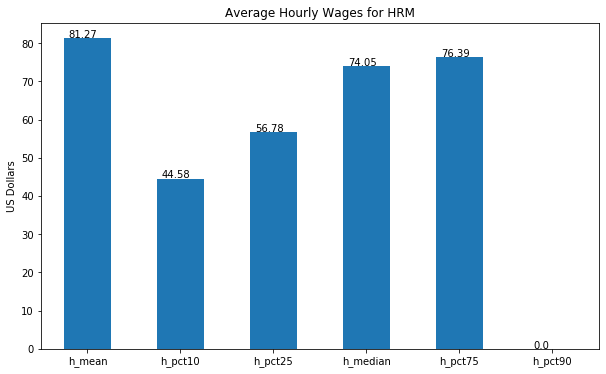

In [200]:
Merged.iloc[[2]+list(range(5,10)),4].plot(kind='bar',figsize=(10,6),rot=0)
plt.title('Average Hourly Wages for HRM')
plt.ylabel('US Dollars')
for i,v in enumerate(Merged.iloc[[2]+list(range(5,10)),4]):
    plt.annotate(v,xy=[(i-0.2),(v+0.2)])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

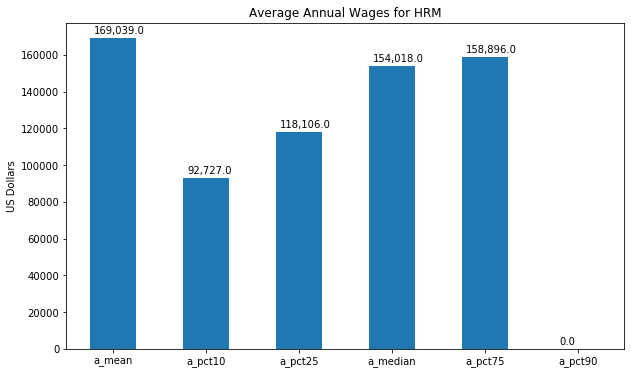

In [198]:
#Merged['Budgets']=Merged['Budgets'].round(2)
Merged.iloc[[3]+list(range(10,15)),4].plot(kind='bar',figsize=(10,6),rot=0)
plt.title('Average Annual Wages for HRM')
plt.ylabel('US Dollars')
for i,v in enumerate(Merged.iloc[[3]+list(range(10,15)),4]):
    plt.annotate("{:,}".format(v),xy=[(i-0.2),(v+2500)])
plt.show